# ABOUT DATASET:- 

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

# About this Parameter
Information about dataset attributes -

    1. Pregnancies: To express the Number of pregnancies
    2. Glucose: To express the Glucose level in blood
    3. BloodPressure: To express the Blood pressure measurement
    4. SkinThickness: To express the thickness of the skin
    5. Insulin: To express the Insulin level in blood
    6. BMI: To express the Body mass index
    7. DiabetesPedigreeFunction: To express the Diabetes percentage
    8. Age: To express the age
    9. Outcome: To express the final result 1 is Yes and 0 is No

# General Information on Variables
BloodPressure:
- Normal: Systolic less than 120 and diastolic less than 80
- Elevated: Systolic 120–129 and diastolic less than 80
- Hypertension stage 1: Systolic 130–139 and diastolic 80–89
- Hypertension stage 2: Systolic 140-plus and diastolic 90 or more

Adult Body Mass Index:
- If your BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to <25, it falls within the healthy weight range.
- If your BMI is 25.0 to <30, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obesity range.

Glucose Tolerance:
- Normal: less than 140 mg/dL
- Impaired : 140 to 200 mg/dL
- Abnormal (Diagnostic): Tw greater than 200 mg/dL

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
def add_bar_labels(ax):
    #ax = plt.gca()
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2., i.get_height(), 
                '%d' % int(i.get_height()), fontsize=10, 
                ha="center", va='bottom')

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
integer = (df.dtypes == 'int64')
int_col = list(integer[integer].index)
print("No.of parameter have D-type as integer :- ",len(int_col))
print("are :- ",int_col)
print('-'*114)

flt = (df.dtypes == 'float64')
flt_col = list(flt[flt].index)
print("No. of parameter have D-type as integer :- ",len(flt_col))
print('are :- ',flt_col)

No.of parameter have D-type as integer :-  7
are :-  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age', 'Outcome']
------------------------------------------------------------------------------------------------------------------
No. of parameter have D-type as integer :-  2
are :-  ['BMI', 'DiabetesPedigreeFunction']


In [12]:

print("No. of duplicate data present in dataset :- ",sum(df.duplicated()))

No. of duplicate data present in dataset :-  0


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
print("No. of unique value present :- ",df['Pregnancies'].nunique())

No. of unique value present :-  17


In [15]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

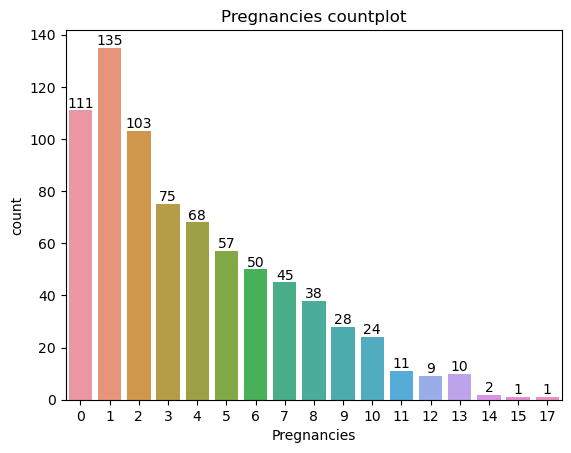

In [16]:
sns.countplot(data=df, x = 'Pregnancies')

ax = plt.gca()
add_bar_labels(ax)
plt.title("Pregnancies countplot")
plt.show()

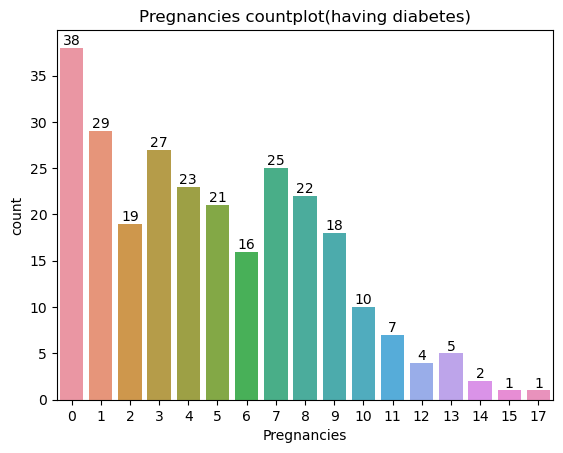

In [194]:
sns.countplot(data=df[df['Outcome']==1], x = 'Pregnancies')

ax = plt.gca()
add_bar_labels(ax)
plt.title("Pregnancies countplot(having diabetes)")
plt.show()

In [197]:
nums = sorted(df['Pregnancies'].unique())

for i in nums:
    instances_count = len(df[df['Pregnancies'] == i])
    positive_count = len(df[(df['Pregnancies']==i) & (df['Outcome']==1)])
    ratio = positive_count/instances_count
    print(f'Ratio of age {i} :- ',ratio)    

Ratio of age 0 :-  0.34234234234234234
Ratio of age 1 :-  0.21481481481481482
Ratio of age 2 :-  0.18446601941747573
Ratio of age 3 :-  0.36
Ratio of age 4 :-  0.3382352941176471
Ratio of age 5 :-  0.3684210526315789
Ratio of age 6 :-  0.32
Ratio of age 7 :-  0.5555555555555556
Ratio of age 8 :-  0.5789473684210527
Ratio of age 9 :-  0.6428571428571429
Ratio of age 10 :-  0.4166666666666667
Ratio of age 11 :-  0.6363636363636364
Ratio of age 12 :-  0.4444444444444444
Ratio of age 13 :-  0.5
Ratio of age 14 :-  1.0
Ratio of age 15 :-  1.0
Ratio of age 17 :-  1.0


In [17]:
print("No. of unique value present :- ",df['Age'].nunique())


No. of unique value present :-  52


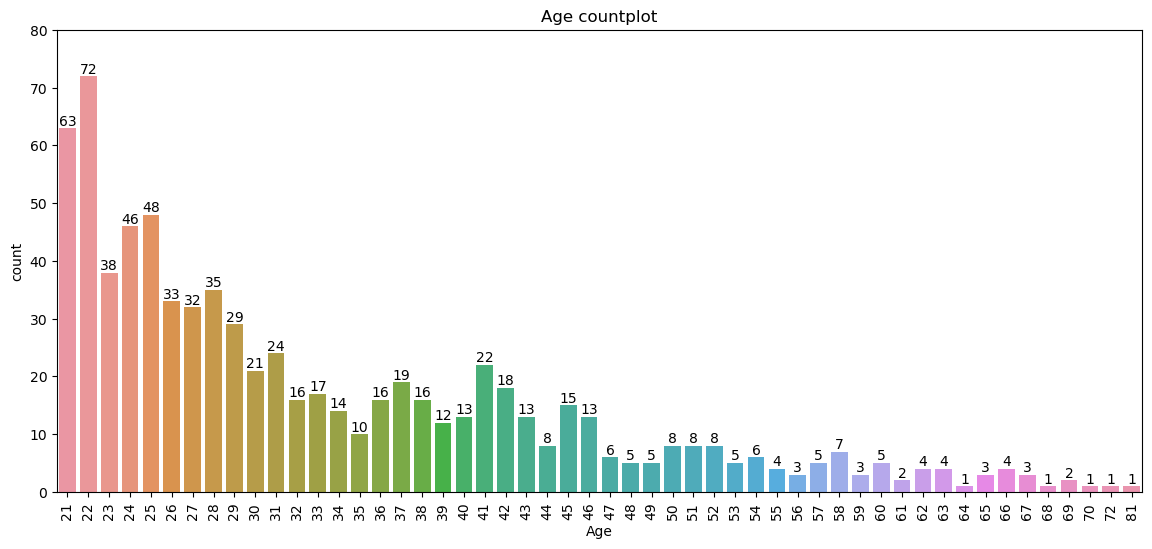

In [160]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x = 'Age')
plt.xticks(rotation=90)
plt.ylim(0, 80)
ax = plt.gca()
add_bar_labels(ax)
plt.title("Age countplot")
plt.show()

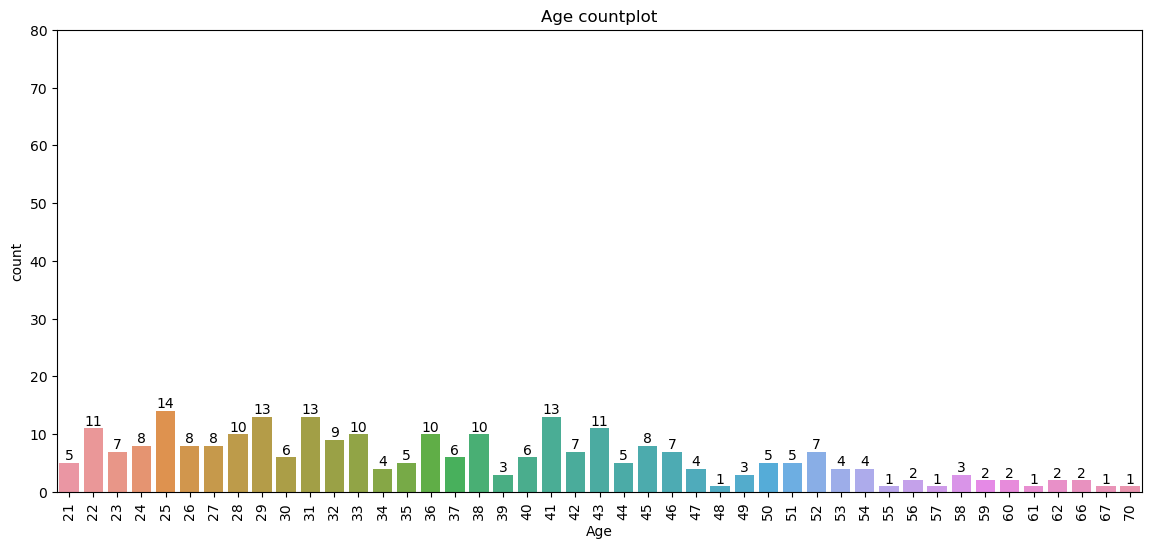

In [32]:
df_Positive = df[df['Outcome']==1]

plt.figure(figsize=(14,6))
sns.countplot(data=df_Positive, x = 'Age')
plt.xticks(rotation=90)
plt.ylim(0, 80)
ax = plt.gca()
add_bar_labels(ax)
plt.title("Age countplot")
plt.show()

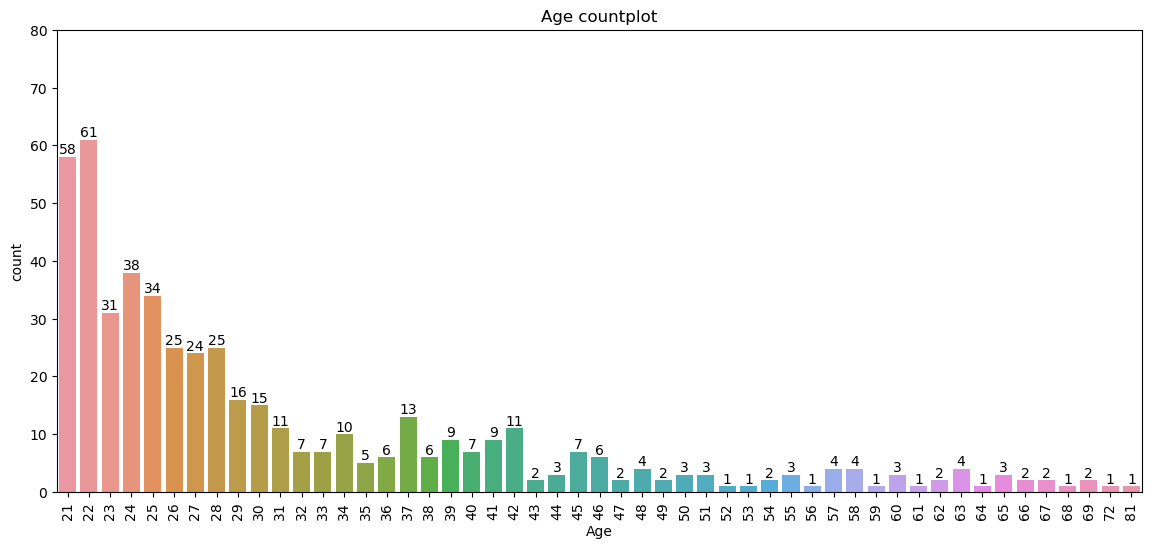

In [34]:
df_negative = df[df['Outcome']==0]

plt.figure(figsize=(14,6))
sns.countplot(data=df_negative, x = 'Age')
plt.xticks(rotation=90)
plt.ylim(0, 80)
ax = plt.gca()
add_bar_labels(ax)
plt.title("Age countplot")
plt.show()

In [198]:
age = sorted(df['Age'].unique())

for i in age:
    instances_count = len(df[df['Age'] == i])
    positive_count = len(df[(df['Age']==i) & (df['Outcome']==1)])
    ratio = positive_count/instances_count
    print(f'Ratio of age {i} :- ',ratio)

Ratio of age 21 :-  0.07936507936507936
Ratio of age 22 :-  0.1527777777777778
Ratio of age 23 :-  0.18421052631578946
Ratio of age 24 :-  0.17391304347826086
Ratio of age 25 :-  0.2916666666666667
Ratio of age 26 :-  0.24242424242424243
Ratio of age 27 :-  0.25
Ratio of age 28 :-  0.2857142857142857
Ratio of age 29 :-  0.4482758620689655
Ratio of age 30 :-  0.2857142857142857
Ratio of age 31 :-  0.5416666666666666
Ratio of age 32 :-  0.5625
Ratio of age 33 :-  0.5882352941176471
Ratio of age 34 :-  0.2857142857142857
Ratio of age 35 :-  0.5
Ratio of age 36 :-  0.625
Ratio of age 37 :-  0.3157894736842105
Ratio of age 38 :-  0.625
Ratio of age 39 :-  0.25
Ratio of age 40 :-  0.46153846153846156
Ratio of age 41 :-  0.5909090909090909
Ratio of age 42 :-  0.3888888888888889
Ratio of age 43 :-  0.8461538461538461
Ratio of age 44 :-  0.625
Ratio of age 45 :-  0.5333333333333333
Ratio of age 46 :-  0.5384615384615384
Ratio of age 47 :-  0.6666666666666666
Ratio of age 48 :-  0.2
Ratio of age

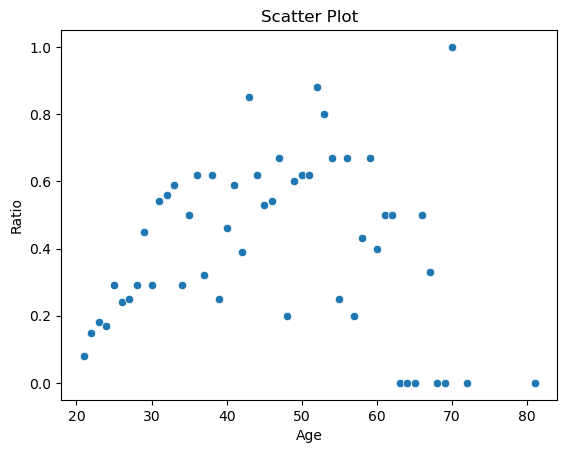

In [92]:
age = sorted(df['Age'].unique())
ratio_list = []

for i in age:
    instances_count = len(df[df['Age'] == i])
    positive_count = len(df[(df['Age']==i) & (df['Outcome']==1)])
    if instances_count != 0:
        ratio = positive_count / instances_count
        ratio_rounded = round(ratio, 2)
        ratio_list.append(ratio_rounded)
    else:
        ratio_list.append(0)


df_ratio = pd.DataFrame({'Column1': age, 'Column2': ratio_list})
df_ratio = df_ratio.rename(columns={'Column1': 'Age', 'Column2': 'Ratio'})

sns.scatterplot(data=df_ratio, x='Age', y='Ratio')

plt.title('Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Ratio')

plt.show()

In [20]:
print("No. of unique values :- ",df['BMI'].nunique())

No. of unique values :-  248


<Axes: xlabel='BMI', ylabel='Density'>

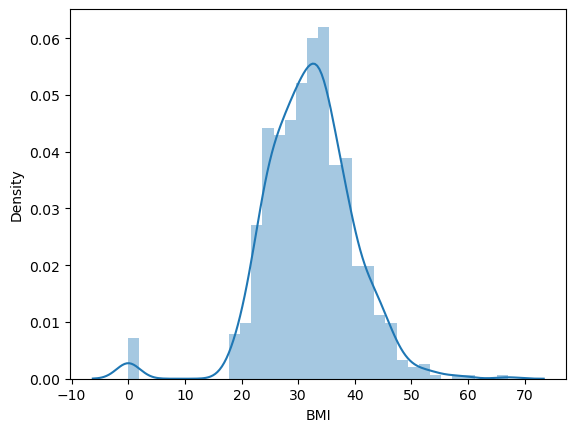

In [21]:
sns.distplot(df['BMI'])

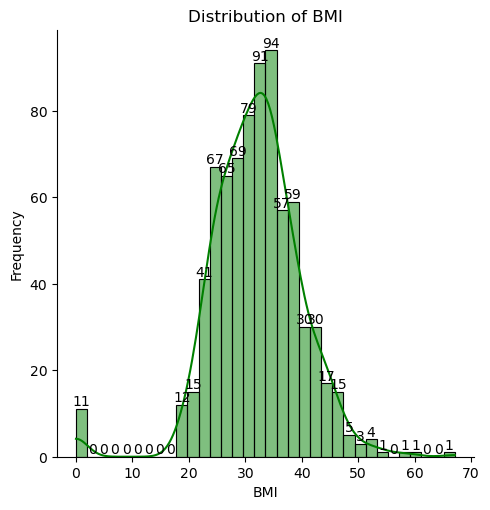

In [22]:

sns.displot(data=df, x = 'BMI', kde=True, color = 'green')
ax = plt.gca()
add_bar_labels(ax)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [114]:
underweight_BMI1 = len(df[df['BMI']<18.5])
print("Underweight total count :- ",underweight_BMI1)
underweight_BMI2 = len(df[(df['BMI']<18.5) & (df['Outcome'])==1])
print("Underweight total count with positive diabetes :- ",underweight_BMI2)
print("The ratio of underweight is :- ",underweight_BMI2/underweight_BMI1)
print('-'*75)

healthy_BMI1 = len(df[(df['BMI']>18.5) & (df['BMI']<25)]) 
print("healthy total count :- ",healthy_BMI1)
healthy_BMI2 = len(df[(df['BMI']>18.5) & (df['BMI']<25)& (df['Outcome'])==1])
print("healthy total count with positive diabetes :- ",healthy_BMI2)
print("The ratio of healthy is :- ",healthy_BMI2/healthy_BMI1)
print('-'*75)

overweight_BMI1 = len(df[(df['BMI']>25) & (df['BMI']<30)]) 
print("overweight total count :- ",overweight_BMI1)
overweight_BMI2 = len(df[(df['BMI']>25) & (df['BMI']<30)& (df['Outcome'])==1])
print("overweight total count with positive diabetes :- ",overweight_BMI2)
print("The ratio of overweight is :- ",overweight_BMI2/overweight_BMI1)
print('-'*75)

obesity_BMI1 = len(df[df['BMI']>30])
print("obesity total count :- ",obesity_BMI1)
obesity_BMI2 = len(df[(df['BMI']>30) & (df['Outcome'])==1])
print("obesity total count with positive diabetes :- ",obesity_BMI2)
print("The ratio of obesity is :- ",obesity_BMI2/obesity_BMI1)

Underweight total count :-  15
Underweight total count with positive diabetes :-  2
The ratio of underweight is :-  0.13333333333333333
---------------------------------------------------------------------------
healthy total count :-  102
healthy total count with positive diabetes :-  7
The ratio of healthy is :-  0.06862745098039216
---------------------------------------------------------------------------
overweight total count :-  173
overweight total count with positive diabetes :-  40
The ratio of overweight is :-  0.23121387283236994
---------------------------------------------------------------------------
obesity total count :-  465
obesity total count with positive diabetes :-  215
The ratio of obesity is :-  0.46236559139784944


In [105]:
underweight_BMI1 = len(df[df['BMI']<18.5])
underweight_BMI2 = len(df[(df['BMI']<18.5) & (df['Outcome'])==0])
print("The ratio of underweight is :- ",underweight_BMI2/underweight_BMI1)


healthy_BMI1 = len(df[(df['BMI']>18.5) & (df['BMI']<25)]) 
healthy_BMI2 = len(df[(df['BMI']>18.5) & (df['BMI']<25)& (df['Outcome'])==0])
print("The ratio of healthy is :- ",healthy_BMI2/healthy_BMI1)

overweight_BMI1 = len(df[(df['BMI']>25) & (df['BMI']<30)]) 
overweight_BMI2 = len(df[(df['BMI']>25) & (df['BMI']<30)& (df['Outcome'])==0])
print("The ratio of overweight is :- ",overweight_BMI2/overweight_BMI1)

obesity_BMI1 = len(df[df['BMI']>30])
obesity_BMI2 = len(df[(df['BMI']>30) & (df['Outcome'])==0])
print("The ratio of obesity is :- ",obesity_BMI2/obesity_BMI1)

The ratio of underweight is :-  51.06666666666667
The ratio of healthy is :-  7.46078431372549
The ratio of overweight is :-  4.208092485549133
The ratio of obesity is :-  1.189247311827957


In [23]:
df['BloodPressure'].nunique()

47

In [24]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

<Axes: xlabel='BloodPressure', ylabel='Density'>

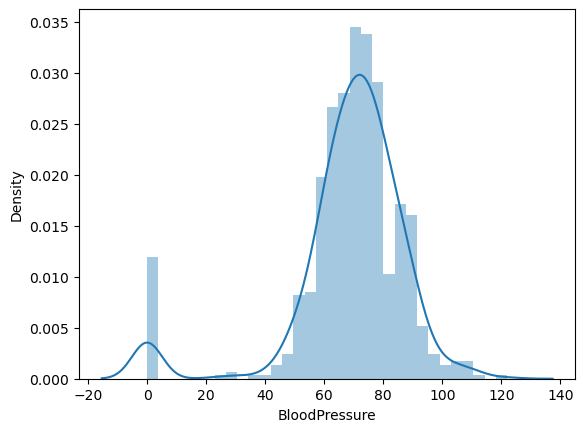

In [25]:
sns.distplot(df['BloodPressure'])

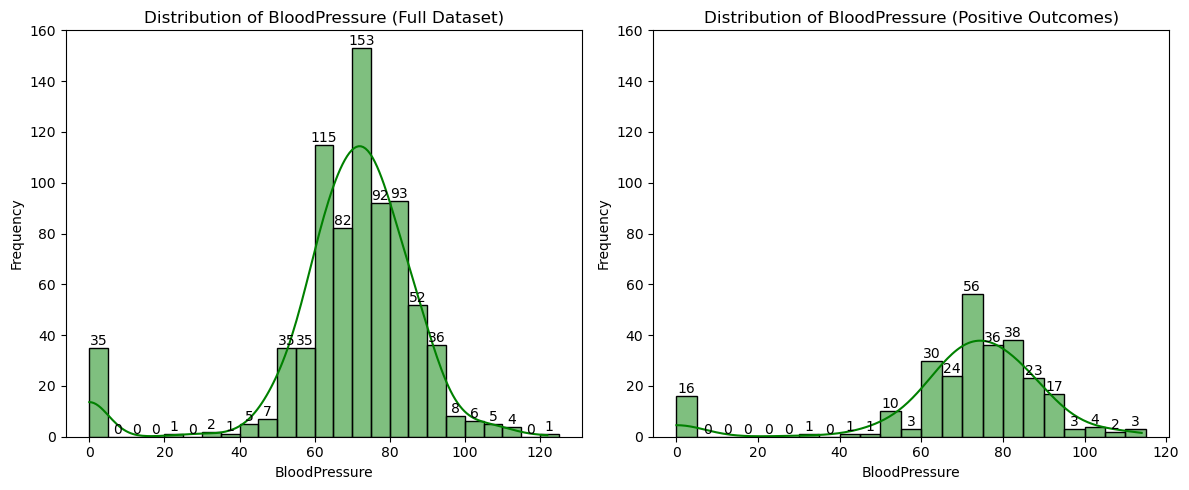

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='BloodPressure', kde=True, color='green', binwidth=5, ax=axes[0])
axes[0].set_ylim(0, 160)
add_bar_labels(axes[0])
axes[0].set_title('Distribution of BloodPressure (Full Dataset)')
axes[0].set_xlabel('BloodPressure')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df_Positive, x='BloodPressure', kde=True, color='green', binwidth=5, ax=axes[1])
axes[1].set_ylim(0, 160)
add_bar_labels(axes[1])
axes[1].set_title('Distribution of BloodPressure (Positive Outcomes)')
axes[1].set_xlabel('BloodPressure')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


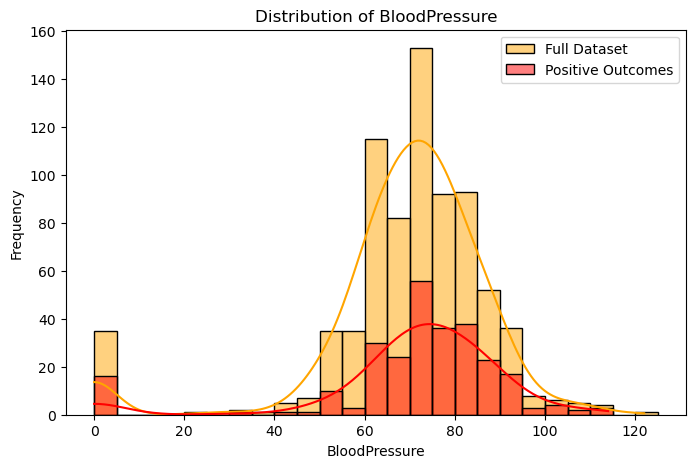

In [136]:
# Plot KDEs of both datasets overlaid
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='BloodPressure', kde=True, color='orange', binwidth=5, label='Full Dataset')
sns.histplot(data=df_Positive, x='BloodPressure', kde=True, color='red', binwidth=5, label='Positive Outcomes')
plt.title('Distribution of BloodPressure')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [27]:
df['Glucose'].nunique()

136

In [111]:
df['Glucose'].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

<Axes: xlabel='Glucose', ylabel='Density'>

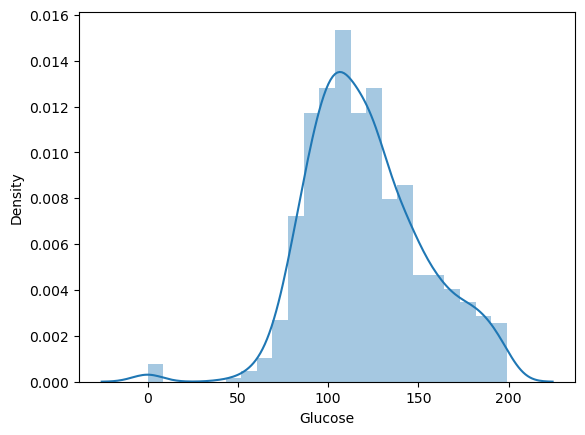

In [112]:
sns.distplot(df['Glucose'])

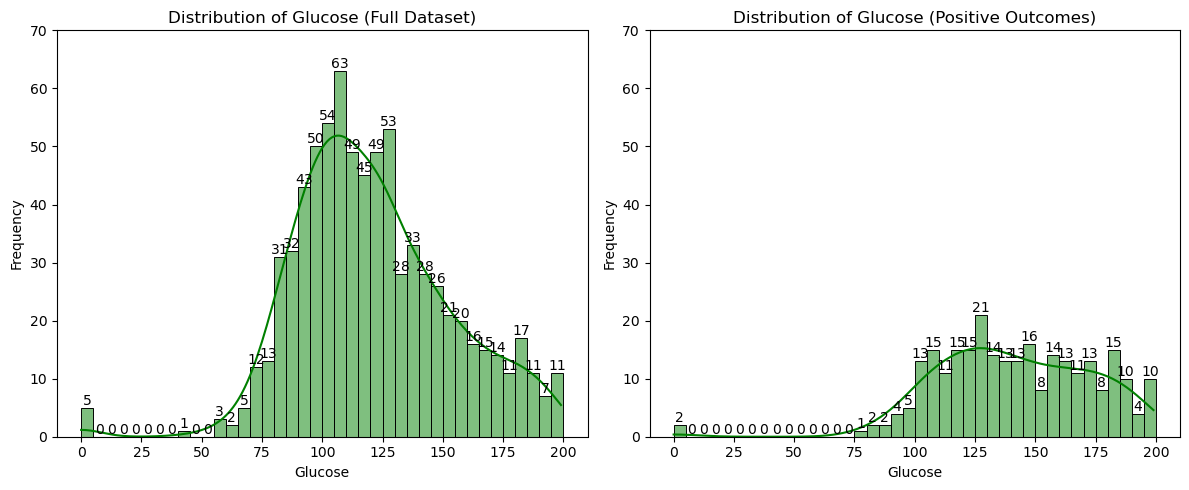

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=df, x='Glucose', kde=True, color='green', binwidth=5, ax=axes[0])
axes[0].set_ylim(0, 70)
add_bar_labels(axes[0])
axes[0].set_title('Distribution of Glucose (Full Dataset)')
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df_Positive, x='Glucose', kde=True, color='green', binwidth=5, ax=axes[1])
axes[1].set_ylim(0, 70)
add_bar_labels(axes[1])
axes[1].set_title('Distribution of Glucose (Positive Outcomes)')
axes[1].set_xlabel('Glucose')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


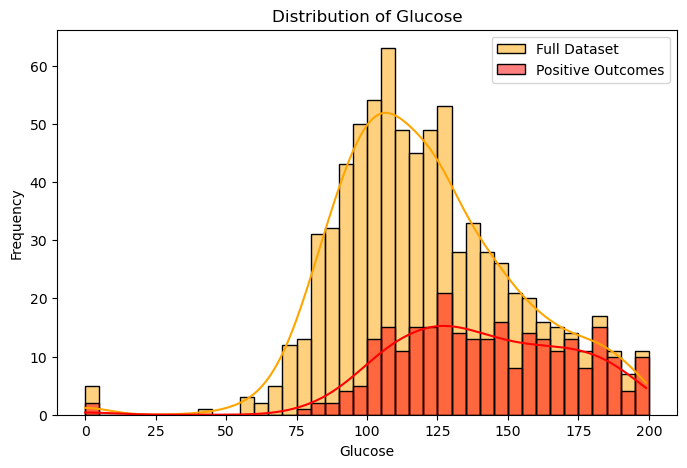

In [131]:
# Plot KDEs of both datasets overlaid
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Glucose', kde=True, color='orange', binwidth=5, label='Full Dataset')
sns.histplot(data=df_Positive, x='Glucose', kde=True, color='red', binwidth=5, label='Positive Outcomes')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [122]:
normal_Glucose1 = len(df[df['Glucose']<140])
print("normal Glucose total count :- ",normal_BMI1)
normal_Glucose2 = len(df[(df['Glucose']<140) & (df['Outcome'])==1])
print("Normal Glucose total count with positive diabetes :- ",normal_Glucose2)
print("The ratio of underweight is :- ",normal_Glucose2/normal_Glucose1)
print('-'*75)

normal_Glucose1 = len(df[df['Glucose']>140])
print("normal total count :- ",normal_Glucose1)
normal_Glucose2 = len(df[(df['Glucose']>140) & (df['Outcome'])==1])
print("Underweight total count with positive diabetes :- ",normal_Glucose2)
print("The ratio of underweight is :- ",normal_Glucose2/normal_Glucose1)
print('-'*75)


normal Glucose total count :-  192
Normal Glucose total count with positive diabetes :-  133
The ratio of underweight is :-  0.2329246935201401
---------------------------------------------------------------------------
normal total count :-  192
Underweight total count with positive diabetes :-  132
The ratio of underweight is :-  0.6875
---------------------------------------------------------------------------


<Axes: xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

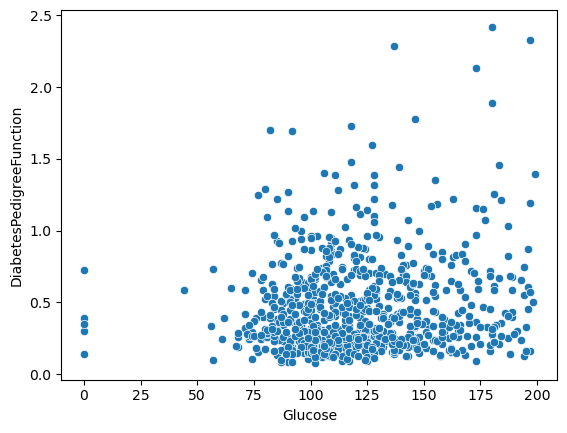

In [142]:
sns.scatterplot(data=df, x = 'Glucose', y='DiabetesPedigreeFunction')

In [138]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [140]:
df['DiabetesPedigreeFunction'].nunique()

517

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

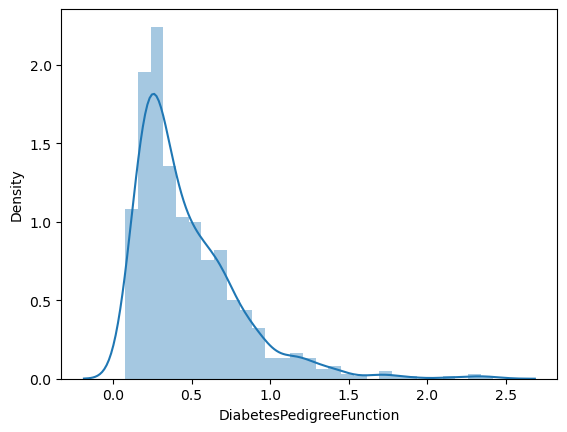

In [141]:
sns.distplot(df['DiabetesPedigreeFunction'])

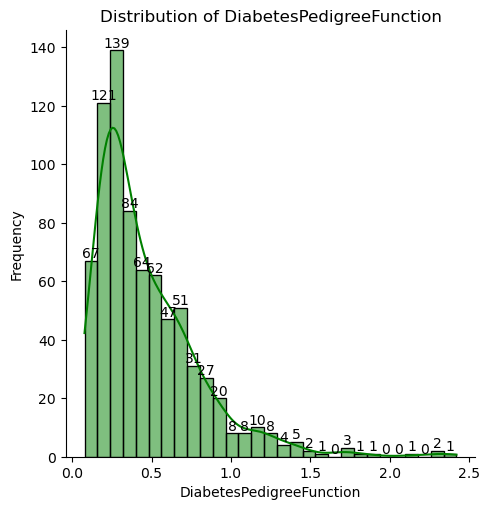

In [146]:

sns.displot(data=df, x = 'DiabetesPedigreeFunction', kde=True, color = 'green')
ax = plt.gca()
add_bar_labels(ax)
plt.title('Distribution of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.show()

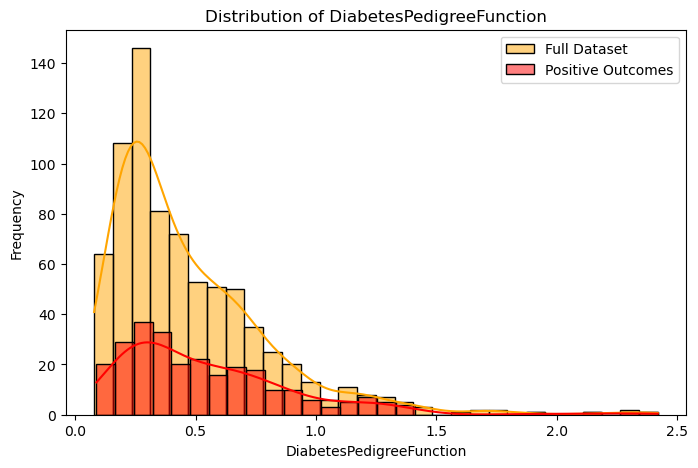

In [156]:
# Plot KDEs of both datasets overlaid
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='DiabetesPedigreeFunction', kde=True, color='orange',bins=30, label='Full Dataset')
sns.histplot(data=df_Positive, x='DiabetesPedigreeFunction', kde=True, color='red',bins=30, label='Positive Outcomes')
plt.title('Distribution of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Frequency')
plt.legend()
plt.show()


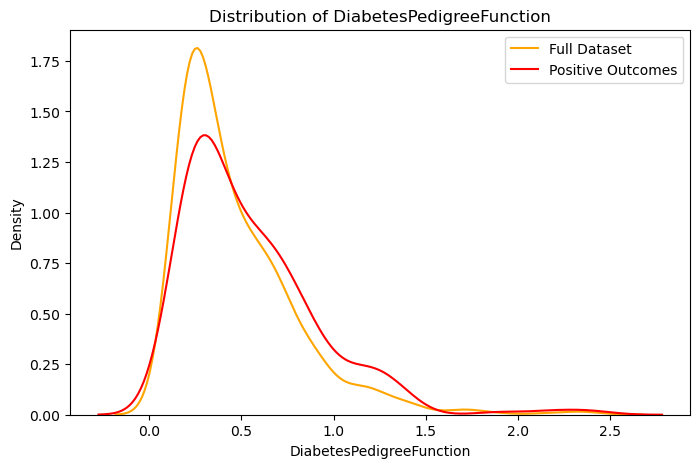

In [151]:
plt.figure(figsize=(8, 5))

sns.kdeplot(data=df['DiabetesPedigreeFunction'], color='orange', label='Full Dataset')
sns.kdeplot(data=df_Positive['DiabetesPedigreeFunction'], color='red', label='Positive Outcomes')
plt.title('Distribution of DiabetesPedigreeFunction')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Density')
plt.legend()
plt.show()

In [143]:
df['DiabetesPedigreeFunction'].mean()

0.47187630208333325

In [144]:
df_negative['DiabetesPedigreeFunction'].mean()

0.42973400000000006

In [145]:
df_Positive['DiabetesPedigreeFunction'].mean()

0.5505

In [ ]:
ANALYSING SkinThickness PARAMETER :- 

In [157]:
df['SkinThickness'].nunique()

51

In [158]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

<Axes: xlabel='SkinThickness', ylabel='count'>

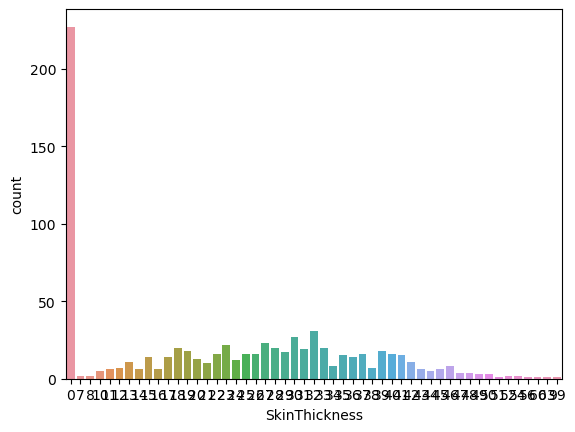

In [167]:
sns.countplot(data=df, x='SkinThickness')

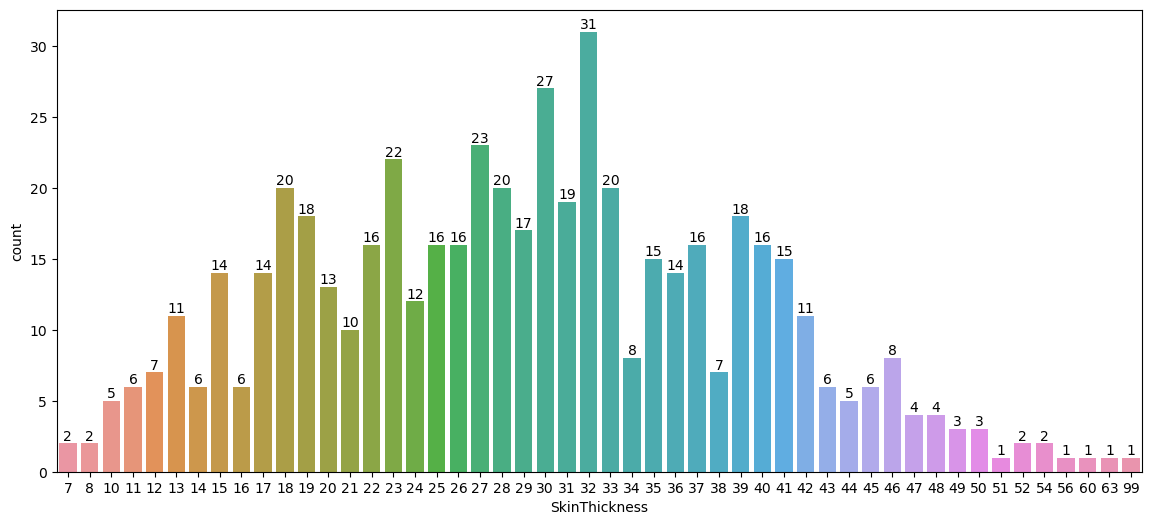

In [172]:
plt.figure(figsize=(14,6))
sns.countplot(data=df[df['SkinThickness']>0], x='SkinThickness')
ax = plt.gca()
add_bar_labels(ax)

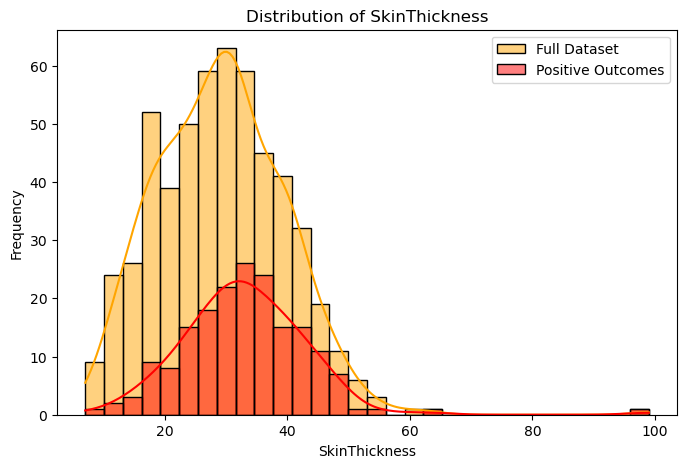

In [174]:
# Plot KDEs of both datasets overlaid
plt.figure(figsize=(8, 5))
sns.histplot(data=df[df['SkinThickness']>0], x='SkinThickness', kde=True, color='orange',bins=30, label='Full Dataset')
sns.histplot(data=df[(df['SkinThickness']>0) & (df['Outcome']==1)], x='SkinThickness', kde=True, color='red',bins=30, label='Positive Outcomes')
plt.title('Distribution of SkinThickness')
plt.xlabel('SkinThickness')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
ANALYSING INSULIN PARAMETER

In [176]:
df['Insulin'].nunique()

186

In [178]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

<Axes: xlabel='Insulin', ylabel='Density'>

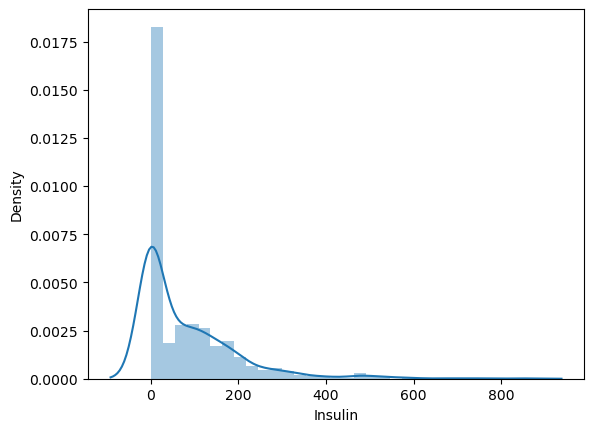

In [179]:
sns.distplot(df['Insulin'])

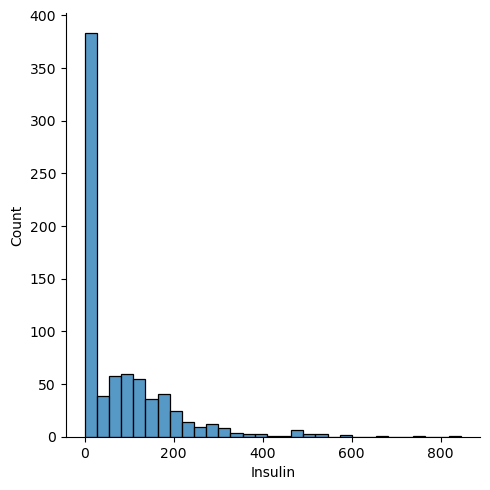

In [185]:
sns.displot(data=df, x='Insulin')

In [189]:
print("Insulin ins 0 :- ",len(df[df['Insulin']==0]))
print("Insulin is 0 and having diabetes :- ",len(df[(df['Insulin']==0) & (df['Outcome']==1)]))

Insulin ins 0 :-  374
Insulin is 0 and having diabetes :-  138


<Axes: xlabel='Insulin', ylabel='DiabetesPedigreeFunction'>

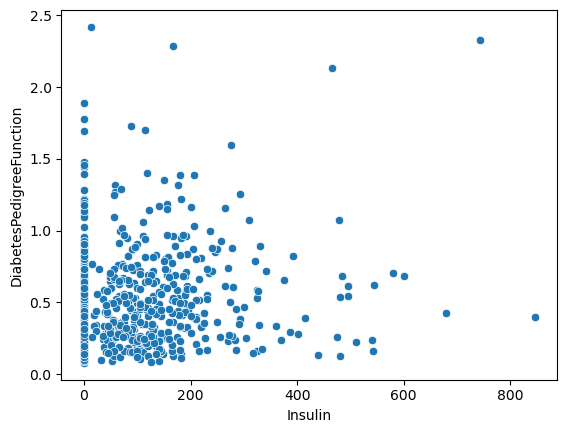

In [191]:
sns.scatterplot(data=df, x='Insulin', y = 'DiabetesPedigreeFunction')


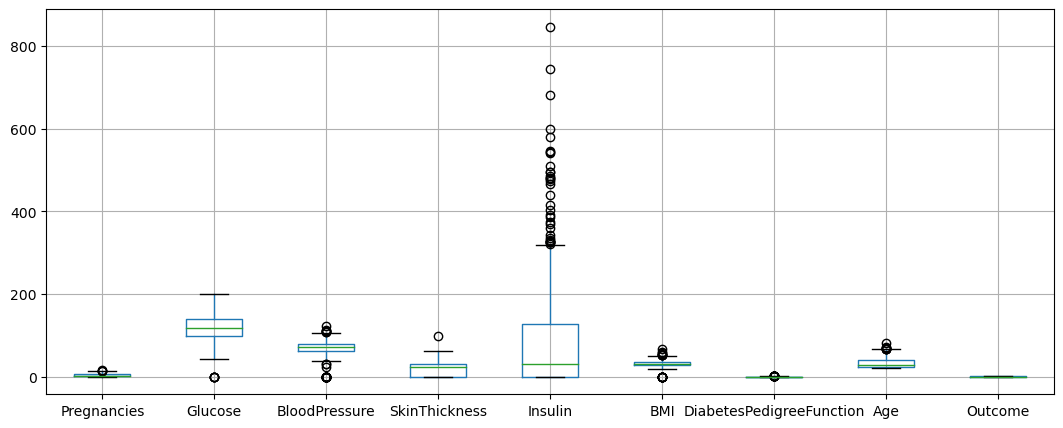

In [199]:
df.boxplot(figsize=(13,5))
plt.show()

<Axes: >

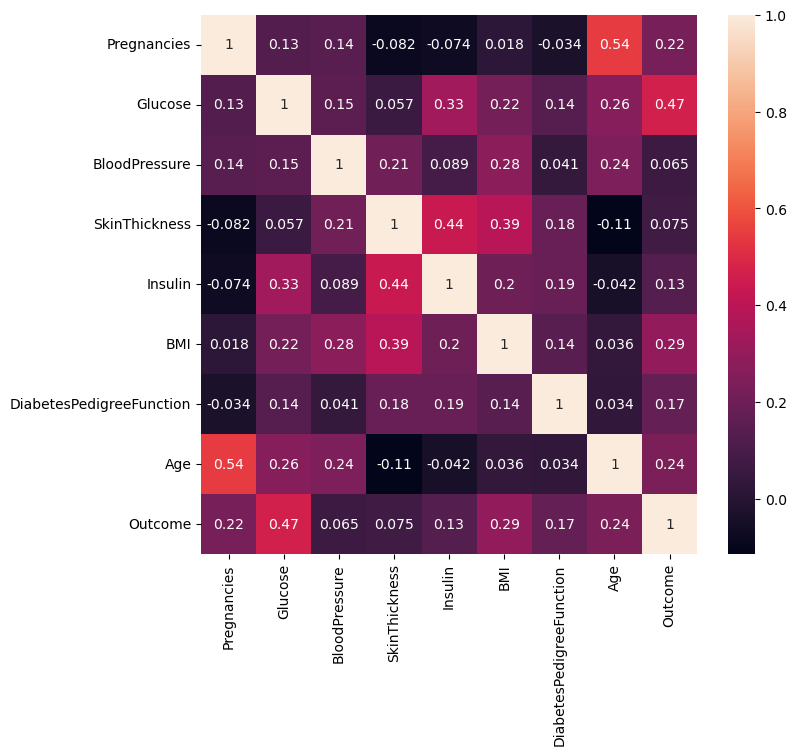

In [204]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True)

In [208]:
# DATA PREPROCESSING  :-



for i in df.columns:
    print(f"{i}:- ",len(df[df[i]==0]))
    
missing_zero = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI" ]      

Pregnancies:-  111
Glucose:-  5
BloodPressure:-  35
SkinThickness:-  227
Insulin:-  374
BMI:-  11
DiabetesPedigreeFunction:-  0
Age:-  0
Outcome:-  500


In [ ]:
df.isnull().sum()

In [211]:
df[missing] = df[missing].replace(0, np.NaN)

In [213]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [214]:
for col in missing:
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = df[df["Outcome"]==0][col].median()
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = df[df["Outcome"]==1][col].median()

In [215]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [225]:
# SPLITING DATA INTO TRAIN AND TEST

X = df.iloc[:,:8]
Y = df['Outcome']

In [227]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size=0.3)

In [228]:
print("Input train shape   :-",X_Train.shape)
print("Output train shape :-",X_Test.shape)
print("Input test shape     :-",Y_Train.shape)
print("Output test shape   :-",Y_Test.shape)

Input train shape   :- (537, 8)
Output train shape :- (231, 8)
Input test shape     :- (537,)
Output test shape   :- (231,)


In [229]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


    LOGISTIC REGRESSION MODEL WITH HYPERPARAMETER TUNING AND CROSS VALIDATION

In [231]:
from sklearn.linear_model import LogisticRegression
parameter = {'max_iter':[100,200,300,500]}
LR_Model = LogisticRegression()
LR_Model_Rs = RandomizedSearchCV(LR_Model, param_distributions=parameter, cv = 5, random_state=42)
LR_Model_Rs.fit(X_Train, Y_Train)

Pred_LR = LR_Model_Rs.predict(X_Test)

LR_Accuracy = accuracy_score(y_true=Y_Test, y_pred=pred)
print("Accuracy using Logistic Regression :- ",LR_Accuracy)

Accuracy using Logistic Regression :-  0.7748917748917749


In [232]:
cm = confusion_matrix(Y_Test.values, Pred_LR)
print(cm)

[[135  22]
 [ 30  44]]


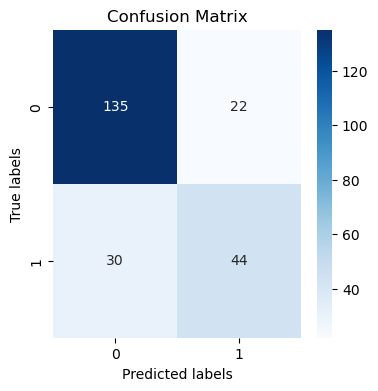

In [233]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

    TRAIN MODEL USING SUPPORT VECTOR MACHINE WITH HYPERPARAMETER AND CROSSVALIDATION

In [251]:
from sklearn.svm import SVC

parameters = {'kernel':['linear', 'rbf','poly','sigmoid'], 'C':[100,50]}

LR_SVM = SVC()
LR_SVM_RS = RandomizedSearchCV(LR_SVM, param_distributions=parameters, cv = 5, random_state=42)
LR_SVM_RS.fit(X_Train, Y_Train)

Y_PRED_SVM = LR_SVM_RS.predict(X_Test)

In [252]:
SVM_Accuracy = accuracy_score(y_true=Y_Test, y_pred=Y_PRED_SVM)
print("Accuracy using upport Vector Machine :- ",SVM_Accuracy)

Accuracy using upport Vector Machine :-  0.8571428571428571


In [253]:
cm2 = confusion_matrix(Y_Test.values, Y_PRED_SVM)
print(cm2)

[[147  10]
 [ 23  51]]


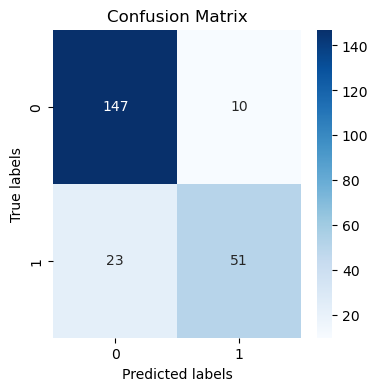

In [254]:
plt.figure(figsize=(4,4))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

    TRAINING MODEL USING RANDOM FOREST WITH HYPERPARAMETER TUNING AND CROSS VALIDATION

In [234]:
from sklearn.tree import DecisionTreeClassifier

parameter = {'max_depth':np.arange(2,11,2)}

DT_Model = DecisionTreeClassifier()
DT_Model_RS = RandomizedSearchCV(DT_Model,
                                 param_distributions=parameter,
                                 cv =5,
                                 random_state=42)
DT_Model_RS.fit(X_Train, Y_Train)
DT_Predict = DT_Model_RS.predict(X_Test) 

In [235]:
DT_Accuracy = accuracy_score(y_true=Y_Test,y_pred=DT_Predict)
print("Accuracy of model using SVM :- ",DT_Accuracy)

Accuracy of model using SVM :-  0.8831168831168831


In [236]:
cm3 = confusion_matrix(Y_Test.values, DT_Predict)
print(cm3)

[[148   9]
 [ 18  56]]


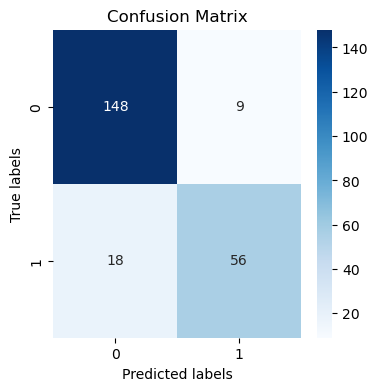

In [237]:
plt.figure(figsize=(4,4))

sns.heatmap(cm3,annot=True, fmt = "d",cmap = 'Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

    TRAINING MODEL USING RANDOM FOREST WITH HYPERPARAMETER TUNING AND CROSS VALIDATION

In [238]:
from sklearn.ensemble import RandomForestClassifier
parameter = {'n_estimators':np.arange(20,101,10), 'max_depth':np.arange(2,11,2)}

RF_Model = RandomForestClassifier()
RF_Model_RS = RandomizedSearchCV(RF_Model, param_distributions=parameter, cv = 5, random_state=42)
RF_Model_RS.fit(X_Train, Y_Train)
RF_Predict = RF_Model_RS.predict(X_Test)

In [239]:
RF_Accuracy = accuracy_score(y_true=Y_Test, y_pred=RF_Predict)
RF_Accuracy

0.8744588744588745

In [240]:
cm4 = confusion_matrix(y_true=Y_Test, y_pred=RF_Predict)
print(cm4)

[[146  11]
 [ 18  56]]


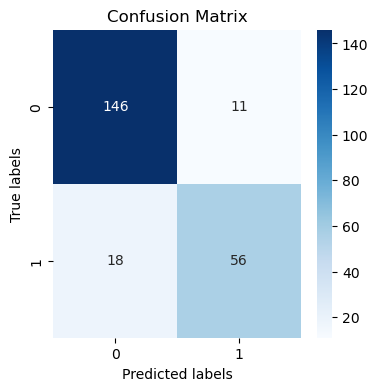

In [250]:
plt.figure(figsize=(4,4))

sns.heatmap(cm4,annot=True, fmt = "d",cmap = 'Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [255]:
print("Accuracy using Logistic Regression :- ",LR_Accuracy)
print("Accuracy using support Vector Machine :- ",SVM_Accuracy)
print("Accuracy of model using Decision Tree :- ",DT_Accuracy)
print("Accuracy of model using Random Forest",RF_Accuracy)

Accuracy using Logistic Regression :-  0.7748917748917749
Accuracy using support Vector Machine :-  0.8571428571428571
Accuracy of model using Decision Tree :-  0.8831168831168831
Accuracy of model using Random Forest 0.8744588744588745


In [ ]:
OUR MODEL IS GIVING THE BEST RESULT USING DECISION TREE 

In [274]:
Pregnancies = int(input("Pregnancies :- "))
Glucose        = float(input("Glucose :- "))
BloodPressure=float(input("BloodPressure :- "))
SkinThickness=float(input("SkinThickness :- "))
Insulin=float(input("Insulin :- "))
BMI=float(input("BMI :- "))
DiabetesPedigreeFunction=float(input("DiabetesPedigreeFunction :- "))
Age=int(input("Age :- "))



pred = [[Pregnancies,Glucose, BloodPressure, SkinThickness ,Insulin, BMI, DiabetesPedigreeFunction,Age]]
    
ans = DT_Model_RS.predict(pred)
print("PREDICTED OUTPUT :- ",ans)

Pregnancies :- 1
Glucose :- 93.0
BloodPressure :- 70.0
SkinThickness :- 31.0
Insulin :- 102.5
BMI :- 30.4
DiabetesPedigreeFunction :- 0.315
Age :- 23
PREDICTED OUTPUT :-  [0]
